In [1]:
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt

In [74]:
def regress(n, p, Cov, B, sigma):
    errors = []
    for t in range(200):
        X = np.random.multivariate_normal(np.zeros(p), Cov, n)
        beta = np.random.normal(size=p)/sqrt(p)
        noise = np.random.normal(scale=sigma, size=n)
        y = X @ beta + noise
        beta_hat = B @ X.T @ np.linalg.inv(X @ B @ X.T) @ y

        n_test = 100
        X_test = np.random.multivariate_normal(np.zeros(p), Cov, n_test)
        error = np.linalg.norm(X_test @ beta - X_test @ beta_hat)**2/n_test
        errors.append(error)
    return errors

In [194]:
def regress_many(n, p, Cov, B_vals, sigma, beta_cov):
    all_errors = []
    all_biases = []
    all_vars = []
    for t in range(200):
        if t % 10 == 0:
            print(t)
        X = np.random.multivariate_normal(np.zeros(p), Cov, n)
#         beta = np.random.normal(size=p)/sqrt(p)
        beta = np.random.multivariate_normal(np.zeros(p), beta_cov)
        noise = np.random.normal(scale=sigma, size=n)
        y = X @ beta + noise
        n_test = 100
        X_test = np.random.multivariate_normal(np.zeros(p), Cov, n_test)
        errors = []
        biases = []
        variances = []
        for B in B_vals:
            K_inv = np.linalg.inv(X @ B @ X.T)
            beta_hat = B @ X.T @ K_inv @ y
            beta_hat_ex = B @ X.T @ K_inv @ X @ beta
            bias = np.linalg.norm(X_test @ beta - X_test @ beta_hat_ex)**2/n_test
            P = np.eye(p) - B @ X.T @ K_inv @ X
            bias_pred = np.trace(P.T @ Cov @ P @ beta_cov)
            error = np.linalg.norm(X_test @ beta - X_test @ beta_hat)**2/n_test
#             variance = error - bias
            variance = sigma**2 * np.trace(np.linalg.matrix_power(K_inv, 2) @ X @ B @ Cov @ B @ X.T)
            print(bias, bias_pred, variance)
            errors.append(error)
            biases.append(bias)
            variances.append(variance)
        all_errors.append(errors)
        all_biases.append(biases)
        all_vars.append(variances)
    mean_errors = np.mean(all_errors, axis=0)
    mean_biases = np.mean(all_biases, axis=0)
    mean_vars = np.mean(all_vars, axis=0)
    return mean_errors, mean_biases, mean_vars

In [30]:
def regress_exact(n, p, Cov, B_vals, sigma, beta_cov):
    all_errors = []
    all_biases = []
    all_vars = []
    for t in range(500):
        print(t)
        if t % 10 == 0:
            print(t)
        
        X = np.random.multivariate_normal(np.zeros(p), Cov, n)

        errors = []
        biases = []
        variances = []
        
        for B in B_vals:
            K_inv = np.linalg.inv(X @ B @ X.T)
            P = np.eye(p) - B @ X.T @ K_inv @ X
            
            bias = np.trace(P.T @ Cov @ P @ beta_cov)
            variance = sigma**2 * np.trace(np.linalg.matrix_power(K_inv, 2) @ X @ B @ Cov @ B @ X.T)
            error = bias + variance
    
            errors.append(error)
            biases.append(bias)
            variances.append(variance)
            
        all_errors.append(errors)
        all_biases.append(biases)
        all_vars.append(variances)
        
    mean_errors = np.mean(all_errors, axis=0)
    mean_biases = np.mean(all_biases, axis=0)
    mean_vars = np.mean(all_vars, axis=0)
    
    return mean_errors, mean_biases, mean_vars

In [272]:
n = 20
p = 100
gamma = p/n
sigma = 0.5
# errors = regress(n, p, 2*np.eye(p), sigma)
theory = (1 - 1./gamma) + sigma**2 * 1/(gamma - 1.)

In [3]:
with open('precomputed_vals.npy', 'rb') as f:
    depths = np.load(f)
    B_vals = np.load(f)

In [273]:
B_vals = []
for d in range(20):
    alpha = 1 - d/100
    print(alpha)
    eigs = [1 + alpha ** i for i in range(p)]
    B_vals.append(np.diag(eigs))

1.0
0.99
0.98
0.97
0.96
0.95
0.94
0.9299999999999999
0.92
0.91
0.9
0.89
0.88
0.87
0.86
0.85
0.84
0.83
0.8200000000000001
0.81


In [276]:
B_vals[-1]

array([[2.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 1.81  , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 1.6561, ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 1.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 1.    ]])

In [31]:
p = 784
sigma = 0.
n = 10
beta = 0.2*np.random.randn(p, 1)
errors, biases, variances = regress_exact(n, p, np.eye(p), B_vals[1:], sigma, beta @ beta.T + B_vals[50])

0
0


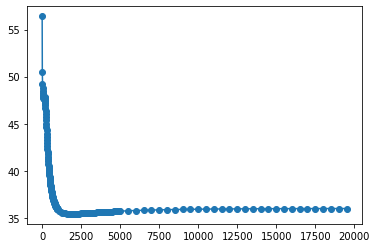

In [32]:
# plt.plot(errors, marker = 'o')
plt.plot(depths[1:], biases, marker = 'o')
# plt.plot(variances, marker = 'o')

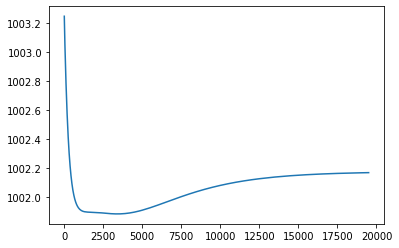

In [33]:
A = beta @ beta.T + B_vals[50]
norms = [np.trace(A @ A) - (np.trace(A @ b)**2)/np.trace(b @ b) for b in B_vals[1:]]
plt.plot(depths[1:], norms)

In [35]:
np.argmin(biases)

108

In [171]:
biases

array([2.34300165, 2.02380471, 1.77274066, 1.57685936, 1.42552363,
       1.31019971, 1.22412294, 1.16196765, 1.11955096, 1.09357726,
       1.08142771, 1.08099665, 1.09057082, 1.10874321, 1.13435235,
       1.16643913, 1.20421567, 1.24704218, 1.29440929, 1.34592332])

In [46]:
## 1D convolutions:
n = 10
p = 20
B_vals = []
B = np.ones((p, p))
for d in range(100):
    print(d)
    B_vals.append(B)
    B_new = np.zeros((p, p))
    for i in range(p):
        for j in range(p):
            B_new[i][j] = B[i][j]
            if i > 0 and j > 0:
                B_new[i][j] += B[i - 1][j - 1]
            if i < p-1 and j < p-1:
                B_new[i][j] += B[i + 1][j + 1]
    B = B_new/np.linalg.norm(B_new)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [54]:
beta = np.random.randn(p, 1)
B_vals = [beta @ beta.T + np.eye(p)*np.abs(i-9.99) for i in range(1, 20)]

In [55]:
# beta = np.random.randn(p, 1)
# # beta = np.ones((p, 1))
# beta_cov = np.eye(p)
# errors, biases, variances = regress_exact(n, p, np.eye(p), B_vals, 1.0, beta @ beta.T)
errors, biases, variances = regress_exact(n, p, np.eye(p), B_vals, 0.1, beta @ beta.T)

0
0
1
2
3
4
5
6
7
8
9
10
10
11
12
13
14
15
16
17
18
19
20
20
21
22
23
24
25
26
27
28
29
30
30
31
32
33
34
35
36
37
38
39
40
40
41
42
43
44
45
46
47
48
49
50
50
51
52
53
54
55
56
57
58
59
60
60
61
62
63
64
65
66
67
68
69
70
70
71
72
73
74
75
76
77
78
79
80
80
81
82
83
84
85
86
87
88
89
90
90
91
92
93
94
95
96
97
98
99
100
100
101
102
103
104
105
106
107
108
109
110
110
111
112
113
114
115
116
117
118
119
120
120
121
122
123
124
125
126
127
128
129
130
130
131
132
133
134
135
136
137
138
139
140
140
141
142
143
144
145
146
147
148
149
150
150
151
152
153
154
155
156
157
158
159
160
160
161
162
163
164
165
166
167
168
169
170
170
171
172
173
174
175
176
177
178
179
180
180
181
182
183
184
185
186
187
188
189
190
190
191
192
193
194
195
196
197
198
199
200
200
201
202
203
204
205
206
207
208
209
210
210
211
212
213
214
215
216
217
218
219
220
220
221
222
223
224
225
226
227
228
229
230
230
231
232
233
234
235
236
237
238
239
240
240
241
242
243
244
245
246
247
248
249
250
250
251
252
253
2

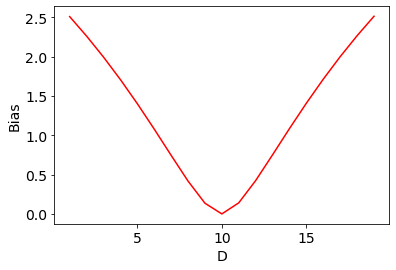

In [59]:
plt.rcParams.update({'font.size': 14})
# plt.plot(range(20, 100), variances, color = 'b', label='variance')
plt.plot(range(1, 20), biases, color = 'r', label='bias')
# plt.plot(range(20, 100), errors)
# plt.plot(range(20, 100), norms)
# plt.legend()
plt.xlabel("D")
plt.ylabel("Bias")
# plt.yscale("log")
plt.savefig("regress/bias_new.pdf", bbox_inches="tight")

In [114]:
n = 20
sigma = 0.5
Cov = B_vals[50]
all_errors = []
for t in range(200):
    if t % 10 == 0:
        print(t)
    X = np.random.multivariate_normal(np.zeros(p), Cov, n)
    beta = np.random.normal(size=p)/sqrt(p)
    noise = np.random.normal(scale=sigma, size=n)
    y = X @ beta + noise
    n_test = 100
    X_test = np.random.multivariate_normal(np.zeros(p), Cov, n_test)
    errors = []
    for B in B_vals[50:]:
        beta_hat = B @ X.T @ np.linalg.inv(X @ B @ X.T) @ y
        error = np.linalg.norm(X_test @ beta - X_test @ beta_hat)**2/n_test
        errors.append(error)
    all_errors.append(errors)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


In [115]:
all_errors = np.array(all_errors)


In [118]:
mean_errors = np.mean(all_errors, axis=0)

In [119]:
mean_errors.shape

(50,)

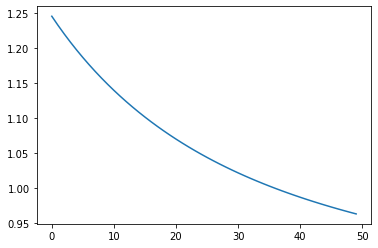